<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [5]:
#Here is a quick look at the Dataframe with a sample!
df.sample(10)

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
462,2001,Journalist,7/17/01,Media,Maria Bartiromo,Media
1138,2005,comedian,9/28/05,Comedy,Jeff Garlin,"Acting, Comedy & Music"
1889,2010,comedian,6/24/10,Comedy,Adam Sandler and Chris Rock,"Acting, Comedy & Music"
1259,2006,former vice president,6/28/06,Politician,Al Gore,Government and Politics
1730,2009,Author,6/3/09,Media,Michael Lewis,Media
873,2004,writer,2/24/04,Media,John Podhoretz,Media
1072,2005,actor,4/6/05,Acting,Matthew McConaughey,"Acting, Comedy & Music"
1354,2007,Professor,3/19/07,Academic,Stephen Prothero,Other
848,2004,Journalist,11/16/04,Media,Tom Brokaw,Media
1687,2009,author,3/9/09,Media,Nathaniel Frank,Media


In [0]:
#Here I am defining the variables for the series needed in crosstab function
year = df['Year']
occupation = df['Occupation']

In [7]:
#Now I am making a crosstab dataframe with year and occupation, and also a normalized index
ct = pd.crosstab(year, occupation, normalize='index')

#Seeing if the percentages are correct, and they are!
ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


# Part 2 — Recreate this explanatory visualization:

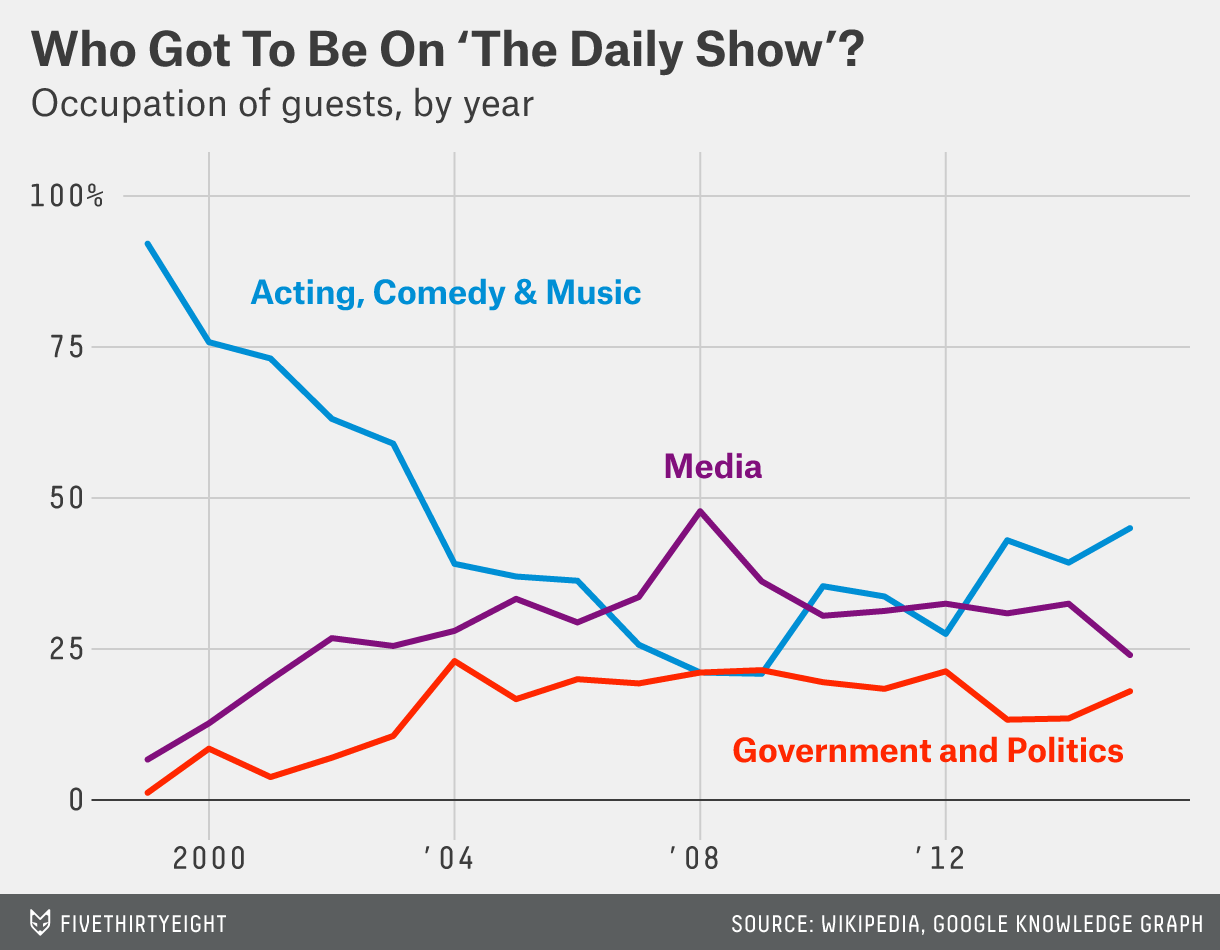

In [8]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

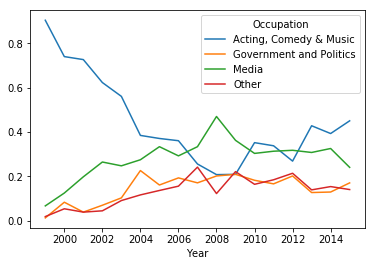

In [9]:
ax = ct.plot.line(); #Here is a siple version of the plot

In [10]:
#I am dropping 'other' column since it is not needed for the plot
ct = ct.drop(columns='Other')

#Now I am going to see if the 'other' column was dropped
ct.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,0.903614,0.012048,0.066265
2000,0.739645,0.082840,0.124260
2001,0.726115,0.038217,0.197452
2002,0.622642,0.069182,0.264151
2003,0.560241,0.102410,0.246988


In [11]:
#And now we are going to multiply each column by 100 to get a percentage format to match the example plot 
ct['Acting, Comedy & Music'] = ct['Acting, Comedy & Music'] * 100
ct['Government and Politics'] = ct['Government and Politics'] * 100
ct['Media'] = ct['Media'] * 100

#Let's check the percent format 
ct.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,90.361446,1.204819,6.626506
2000,73.964497,8.284024,12.426036
2001,72.611465,3.821656,19.745223
2002,62.264151,6.918239,26.415094
2003,56.024096,10.240964,24.698795


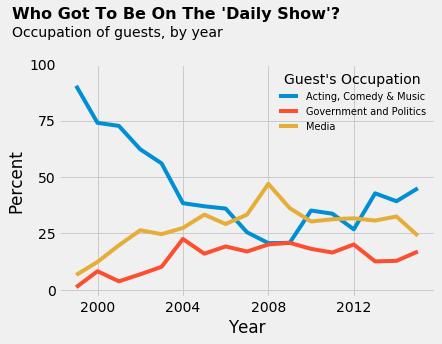

In [12]:
#Setting the plot style
plt.style.use('fivethirtyeight')

#This is the plot 
ax = ct.plot.line()

#Here we are creating, positioning and setting font of the title
ax.text(x=1996, y=120, s="Who Got To Be On The 'Daily Show'?",
       fontsize=16, fontweight='bold')

#Now let's create and position the subtitle
ax.text(x=1996, y=112, s="Occupation of guests, by year")

#Let's add 'Year' to X label, and 'Percent' to Y label. Also we need to set tick mark ranges
ax.set(xlabel='Year', ylabel='Percent', xticks=range(2000, 2016, 4), yticks=range(0, 110, 25))

#Lastly we should make the legend look visualy appealing
ax.legend(title="Guest's Occupation", fontsize='x-small', frameon=False);

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [13]:
#We should take a quick look at the dataframe
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [14]:
#Let's also look at the Guest value counts
df['Guest'].value_counts().head()

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Ricky Gervais     13
Paul Rudd         13
Name: Guest, dtype: int64

In [0]:
#Now we are going to create the top ten guests dataframe 
top_ten = pd.DataFrame(df['Guest'].value_counts().nlargest(10))

In [16]:
#Here is the new dataframe
top_ten

,Guest
Fareed Zakaria,19
Denis Leary,17
Brian Williams,16
Ricky Gervais,13
Paul Rudd,13
Tom Brokaw,12
Richard Lewis,10
Will Ferrell,10
Reza Aslan,10
Bill O'Reilly,10


In [17]:
#We should make the guest names a column instead of the index
top_ten = top_ten.reset_index()

#Let's take another look at the new column
top_ten

,index,Guest
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Ricky Gervais,13
4,Paul Rudd,13
5,Tom Brokaw,12
6,Richard Lewis,10
7,Will Ferrell,10
8,Reza Aslan,10
9,Bill O'Reilly,10


In [18]:
#We need to rename the columns of the top_ten dataframe
top_ten = top_ten.rename(columns={'Guest': 'Number of Appearances', 'index': 'Guest'})

#Let's look at the new column names
top_ten.head()

,Guest,Number of Appearances
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Ricky Gervais,13
4,Paul Rudd,13


In [19]:
#And now we need to install the latest version of seaborn to make the top ten guests plot
!pip install --upgrade seaborn


Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [20]:
#We need to check to make sure we are running the latest version of seaborn
import seaborn as sns
sns.__version__

'0.9.0'

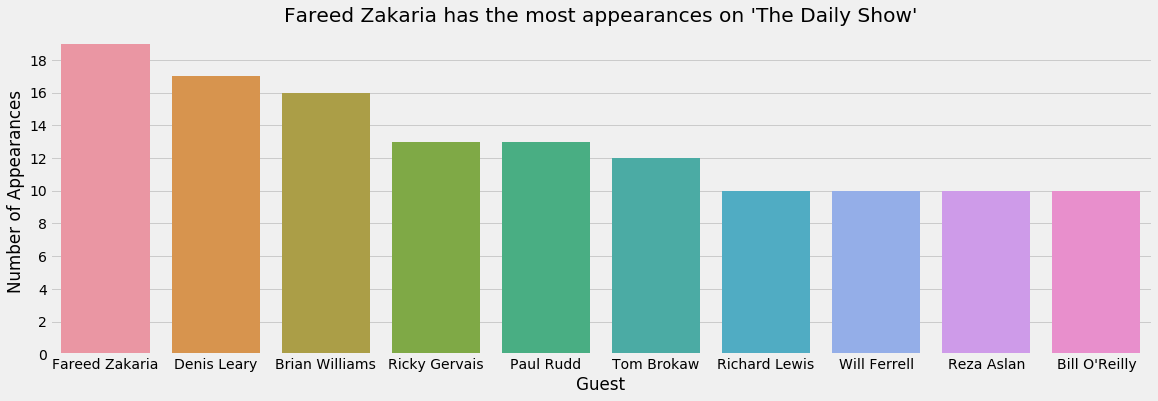

In [21]:
#Finally we are going to make a categorical bar plot with guests and their number of appearances
ax1 = sns.catplot('Guest','Number of Appearances', data=top_ten, kind='bar',
                  height=5.5, aspect=3);

#Also we need to add a title expaling the bar plot
plt.title("Fareed Zakaria has the most appearances on 'The Daily Show'");

#Lastly let's make the plot easier to read by adding more tick marks
plt.yticks(range(0, 20, 2));


So here are the top 10 guest appearances on the Daily show, with Fareed Zakaria having the most at 19.